# Retrieval across datasets

We start by loading two datasets. Both datasets are of sea turtles. But the first dataset `df1` depicts loggerhead turtles, the second dataset `df2` depict green turtles. The are stored in folders `root1` and `root2`, respectively.

In [1]:
import sys
sys.path.append('..')
import os
import pandas as pd
from wildlife_datasets import analysis, datasets, loader, splits

root1 = '/mnt/data/turtles/datasets/datasets/SeaTurtleIDHeads'
root2 = '/mnt/data/turtles/datasets/datasets/ZindiTurtleRecall'

df1 = datasets.SeaTurtleIDHeads(root1).df
df2 = datasets.ZindiTurtleRecall(root2).df

The dataframes contain lots of information. We will use only columns `identity` and `path`. The former is the identity (class) of the image and the latter is the **relative** path to the image. Ignore all other information including the split.

In [2]:
df1

,id,identity,path,split,date,orientation
0,0,t281,images/t281/ILXxnZwvNh.JPG,train,2016-07-11 16:53:31,topleft
1,1,t281,images/t281/DjtwgIIURL.JPG,train,2016-07-11 16:53:13,right
2,2,t281,images/t281/hHfmOdhzDU.JPG,train,2016-07-11 16:53:33,topleft
3,3,t281,images/t281/gTovpgwOut.JPG,test,2016-07-11 16:54:03,left
4,4,t281,images/t281/yUETlrBYAp.JPG,train,2016-07-11 16:53:12,right
...,...,...,...,...,...,...
7577,7769,t157,images/t157/onmATVzAyB.JPG,train,2015-06-30 17:43:34,topleft
7578,7770,t157,images/t157/FQNPajeBYd.JPG,train,2015-06-30 17:42:46,topright
7579,7771,t157,images/t157/cwXNsIVEFz.JPG,train,2015-06-30 17:43:10,top
7580,7772,t157,images/t157/blzCVWUqSI.JPG,train,2015-06-30 17:43:12,right


We split both datasets such that the training and testing sets contain no joint individuals.

In [3]:
splitter = splits.DisjointSetSplit(0.2)
idx_train1, idx_test1 = splitter.split(df1)[0]
splitter = splits.DisjointSetSplit(0.2)
idx_train2, idx_test2 = splitter.split(df2)[0]

df1_train, df1_test = df1.loc[idx_train1], df1.loc[idx_test1]
df2_train, df2_test = df2.loc[idx_train2], df2.loc[idx_test2]

Then we check that the intersection of identities (classes) is indeed empty.

In [4]:
def check_empty_intersection(df1, df2, col):
    val1 = set(df1[col].unique())
    val2 = set(df2[col].unique())
    if len(val1.intersection(val2)):
        raise Exception('Intersection is not empty')

check_empty_intersection(df1, df2, 'identity')
check_empty_intersection(df1_train, df1_test, 'identity')
check_empty_intersection(df2_train, df2_test, 'identity')

We plot the training subsets of `df1` and `df2`. Closer look at the turtles shows that the turtles in both images are different (loggerhead turtles in the first image and green turtles in the second image).

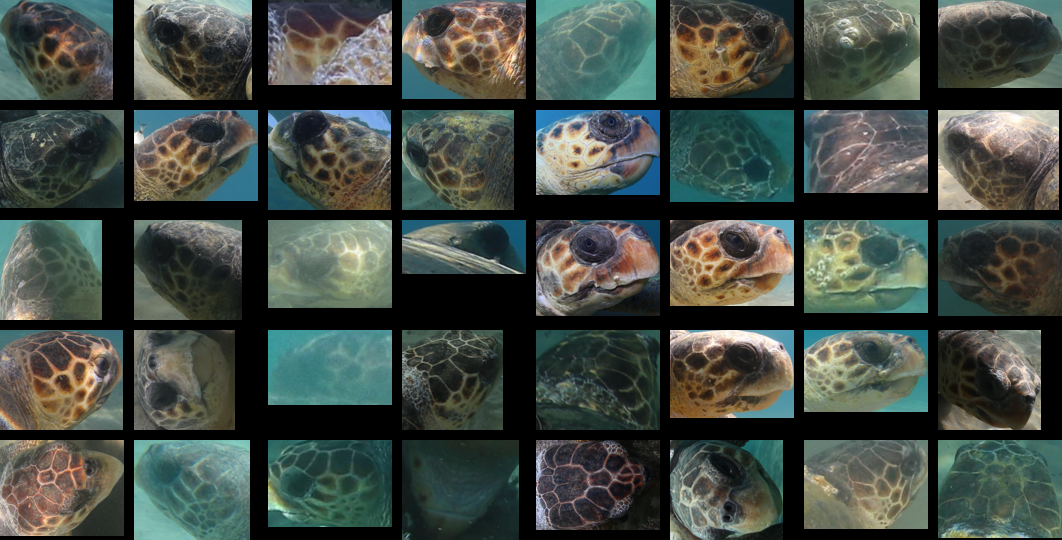

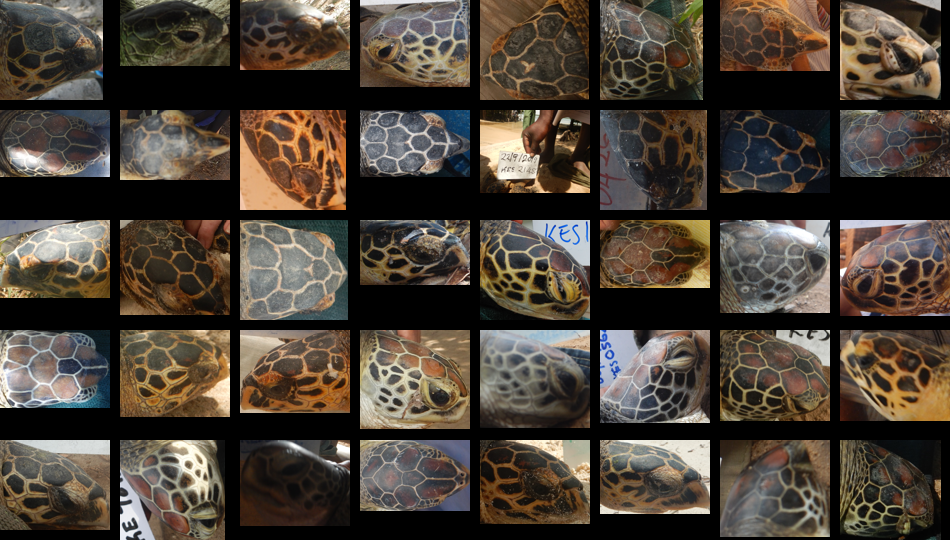

In [5]:
display(analysis.plot_grid(df1_train, root1))
display(analysis.plot_grid(df2_train, root2))

The goal is to train 2 models for each training set.

In [6]:
def train(df, root):
    # df['identity'] # labels
    # root + '/' + df['path'] # path to images
    return None

model1 = train(df1_train, root1)
model2 = train(df2_train, root2)

The evaluation should be performed 4 times. For each model, it will be done on the testing set corresponding to the same and other turtle species. The metric can be for example MAP@5 (if you think that it is a good idea).

In [7]:
def evaluate(model, df, root):
    # df['identity'] # labels
    # root + '/' + df['path'] # path to images
    return None    

evaluate(model1, df1_test, root1)
evaluate(model1, df2_test, root2)
evaluate(model2, df1_test, root1)
evaluate(model2, df2_test, root2)